(np.float64(-0.5), np.float64(214.5), np.float64(233.5), np.float64(-0.5))

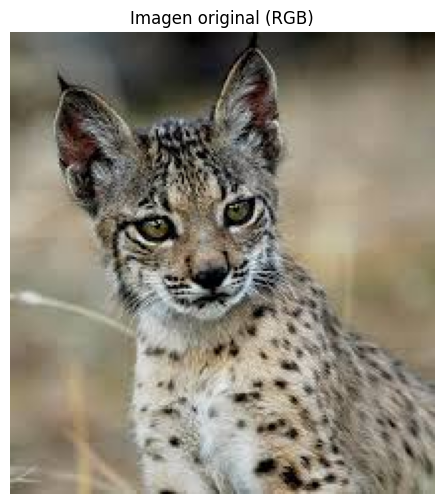

In [1]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen (OpenCV la carga en BGR)
img_bgr = cv2.imread("lince.jfif")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.title("Imagen original (RGB)")
plt.imshow(img_rgb)
plt.axis("off")


Filtros

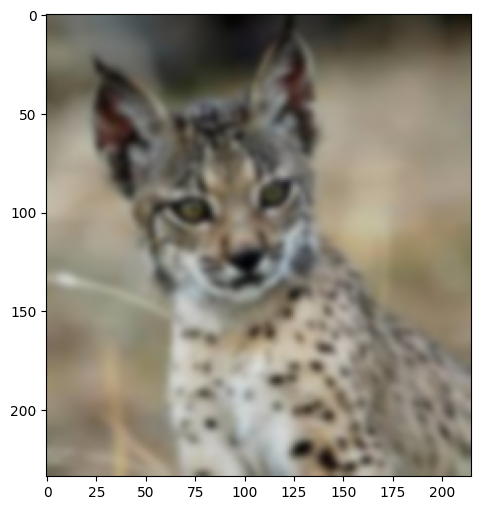

In [3]:
#suavizado  y desenfoque
blur = cv2.GaussianBlur(img_rgb, (9,9), 0)

plt.figure(figsize=(6,6))
plt.imshow(blur)


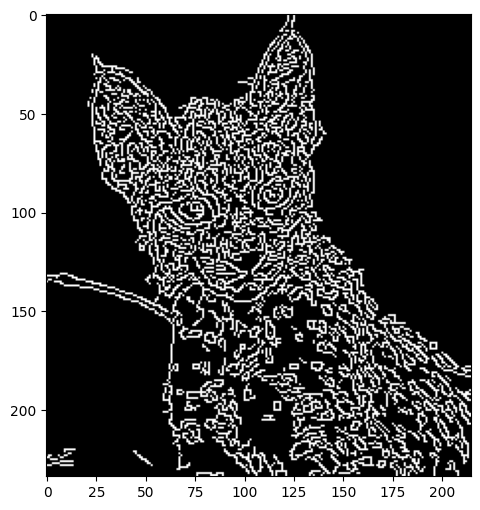

In [4]:
#Realce de bordes
edges = cv2.Canny(img_bgr, 100, 200)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap="gray")

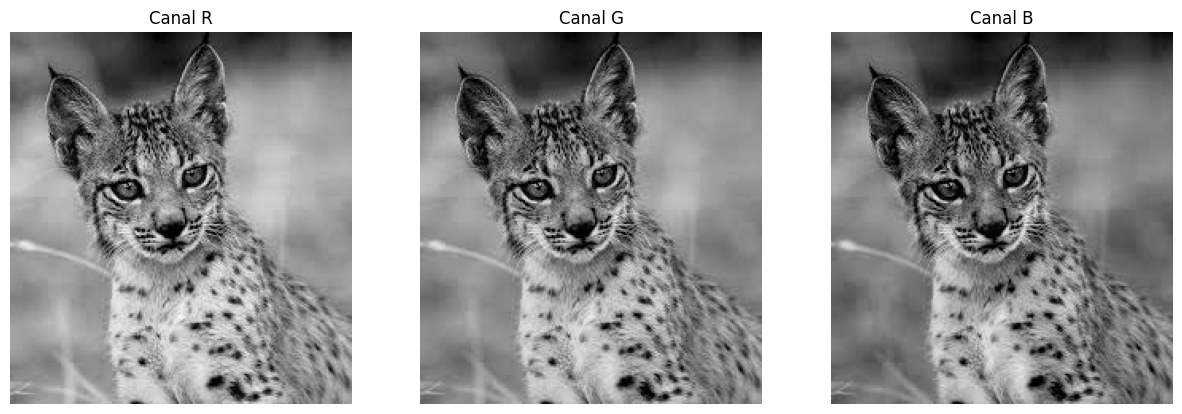

In [5]:
#visualizacion R G B
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(R, cmap="gray"); axs[0].set_title("Canal R"); axs[0].axis("off")
axs[1].imshow(G, cmap="gray"); axs[1].set_title("Canal G"); axs[1].axis("off")
axs[2].imshow(B, cmap="gray"); axs[2].set_title("Canal B"); axs[2].axis("off")
plt.show()


Operaciones morfológicas

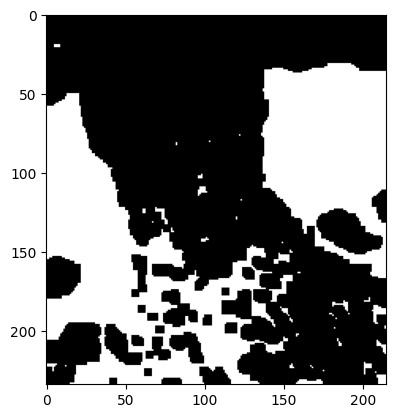

In [8]:
#convertir a escala de grices y binarizar
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#Erosión
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
erosion = cv2.erode(binary, kernel, iterations=1)

plt.imshow(erosion, cmap="gray")


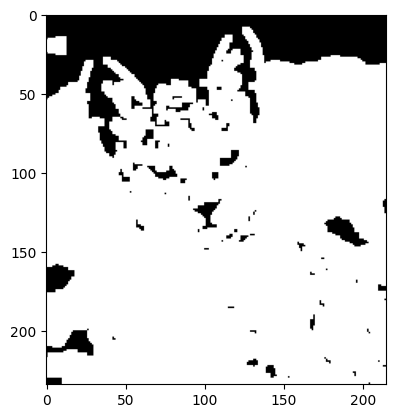

In [9]:
#dilatación
dilation = cv2.dilate(binary, kernel, iterations=1)

plt.imshow(dilation, cmap="gray")

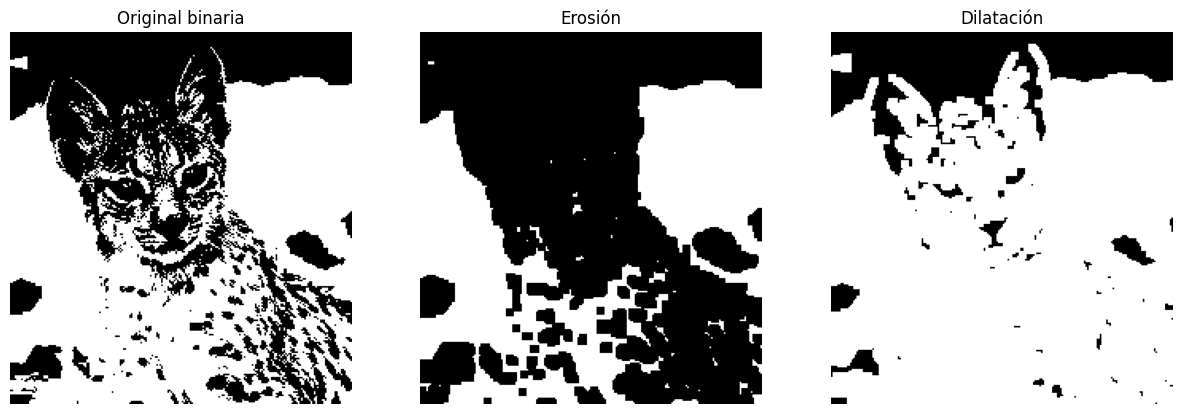

In [10]:
#Comparación
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(binary, cmap="gray"); axs[0].set_title("Original binaria"); axs[0].axis("off")
axs[1].imshow(erosion, cmap="gray"); axs[1].set_title("Erosión"); axs[1].axis("off")
axs[2].imshow(dilation, cmap="gray"); axs[2].set_title("Dilatación"); axs[2].axis("off")
plt.show()


Animación/gif

In [11]:
import imageio

frames = []

# imágenes para el GIF
frames.append(img_rgb)            # original
frames.append(blur)               # suavizado
frames.append(cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB))  # bordes
frames.append(cv2.cvtColor(erosion, cv2.COLOR_GRAY2RGB))
frames.append(cv2.cvtColor(dilation, cv2.COLOR_GRAY2RGB))

# guardar GIF
imageio.mimsave("procesamiento.gif", frames, fps=1)
